In [1]:
# pip install pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.metrics import accuracy_score

In [2]:
start='2010-01-01'
end='2021-12-31'

df=data.DataReader('MRF.NS','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,6215.000000,6032.0,6081.000000,6142.950195,18735.0,5990.333984
2010-01-05,6269.000000,6150.0,6200.000000,6160.600098,17947.0,6007.544434
2010-01-06,6198.000000,6055.0,6180.000000,6090.399902,10735.0,5939.090332
2010-01-07,6371.000000,6151.0,6249.899902,6216.200195,42206.0,6061.764160
2010-01-08,6294.399902,6150.0,6243.299805,6166.850098,11155.0,6013.641602


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,70689.453125,69010.000000,70089.000000,70526.203125,7843.0,70523.007812
2021-12-28,71999.000000,70540.000000,70540.000000,71617.703125,8194.0,71614.453125
2021-12-29,72697.851562,71400.000000,71850.000000,72559.046875,9449.0,72555.757812
2021-12-30,72888.000000,71850.296875,72698.953125,72119.546875,6786.0,72116.273438
2021-12-31,73699.250000,72011.000000,72011.000000,73338.000000,6473.0,73334.671875


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,6215.000000,6032.0,6081.000000,6142.950195,18735.0,5990.333984
1,2010-01-05,6269.000000,6150.0,6200.000000,6160.600098,17947.0,6007.544434
2,2010-01-06,6198.000000,6055.0,6180.000000,6090.399902,10735.0,5939.090332
3,2010-01-07,6371.000000,6151.0,6249.899902,6216.200195,42206.0,6061.764160
4,2010-01-08,6294.399902,6150.0,6243.299805,6166.850098,11155.0,6013.641602


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,6215.000000,6032.0,6081.000000,6142.950195,18735.0
1,6269.000000,6150.0,6200.000000,6160.600098,17947.0
2,6198.000000,6055.0,6180.000000,6090.399902,10735.0
3,6371.000000,6151.0,6249.899902,6216.200195,42206.0
4,6294.399902,6150.0,6243.299805,6166.850098,11155.0


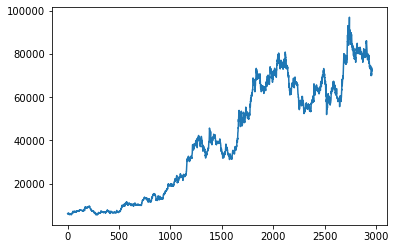

In [6]:
plt.plot(df.Close)

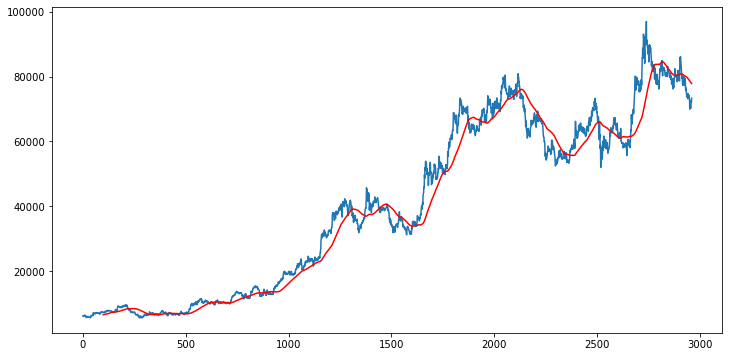

In [7]:
ma100=df.Close.rolling(100).mean()
ma100
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

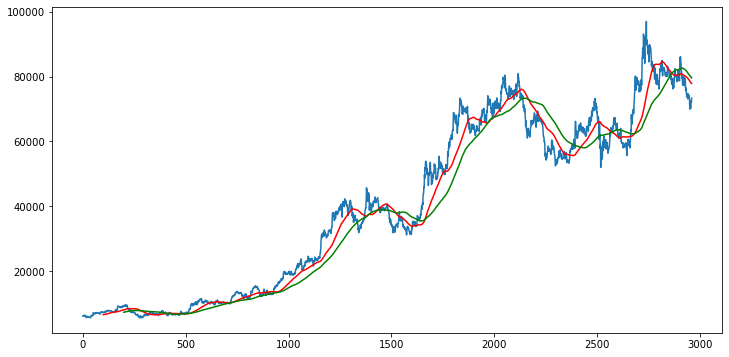

In [8]:
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [9]:
df.shape

(2961, 5)

In [10]:
#Spliting Data Into And Testing

data_train = pd.DataFrame(df['Close'][ 0:int(len(df)*0.70) ])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2072, 1)
(889, 1)


In [11]:
data_train.head()

,Close
0,6142.950195
1,6160.600098
2,6090.399902
3,6216.200195
4,6166.850098


In [12]:
data_test.head()

,Close
2072,76062.351562
2073,76392.250000
2074,77087.601562
2075,75734.046875
2076,74848.898438


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_arr=scal.fit_transform(data_train)
data_train_arr
data_train_arr.shape

(2072, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100, data_train_arr.shape[0]):
    x_train.append(data_train_arr[i-100: i])
    y_train.append(data_train_arr[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#ML MOdel
from keras.layers import Dense,Dropout,LSTM,Embedding
from keras.models import Sequential

In [43]:
model=Sequential()

model.add(LSTM(units=40,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=160,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=200,activation='relu',return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=240,activation='relu',return_sequences=True))
model.add(Dropout(0.7))

model.add(LSTM(units=280,activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(units=25))
model.add(Dense(units =1))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 40)           6720      
                                                                 
 dropout (Dropout)           (None, 100, 40)           0         
                                                                 
 lstm_15 (LSTM)              (None, 100, 80)           38720     
                                                                 
 dropout_1 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_16 (LSTM)              (None, 100, 120)          96480     
                                                                 
 dropout_2 (Dropout)         (None, 100, 120)          0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 160)         

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5, batch_size=20)

Epoch 1/5
99/99 [==============================] - 67s 604ms/step - loss: 0.0623 - accuracy: 0.0010
Epoch 2/5
99/99 [==============================] - 60s 603ms/step - loss: 0.0164 - accuracy: 0.0010
Epoch 3/5
99/99 [==============================] - 65s 652ms/step - loss: 0.0105 - accuracy: 0.0010
Epoch 4/5
99/99 [==============================] - 66s 664ms/step - loss: 0.0108 - accuracy: 0.0010
Epoch 5/5
99/99 [==============================] - 78s 789ms/step - loss: 0.0089 - accuracy: 0.0010


In [46]:
model.save('keras_model.h5')

In [24]:
data_test.head()

,Close
2072,76062.351562
2073,76392.250000
2074,77087.601562
2075,75734.046875
2076,74848.898438


In [25]:
data_train.tail(100)

,Close
1972,72357.046875
1973,72402.851562
1974,71246.101562
1975,71173.351562
1976,71219.851562
...,...
2067,73102.101562
2068,73873.453125
2069,74140.500000
2070,73600.703125


In [26]:
past_100_days=data_train.tail(100)

In [27]:
 final_df=past_100_days.append(data_test,ignore_index=True)

In [28]:
final_df.head()

,Close
0,72357.046875
1,72402.851562
2,71246.101562
3,71173.351562
4,71219.851562


In [29]:
input_data=scal.fit_transform(final_df)
# input_data

In [30]:
input_data.shape

(989, 1)

In [31]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(889, 100, 1)
(889,)


In [33]:
#Making Predication

y_pred=model.predict(x_test)

In [34]:
y_pred.shape

(889, 1)

In [35]:
# y_test

In [36]:
# y_pred

In [37]:
sc=scal.scale_

In [38]:
scal_fac=1/sc
y_pred=y_pred*scal_fac
y_test=y_test*scal_fac

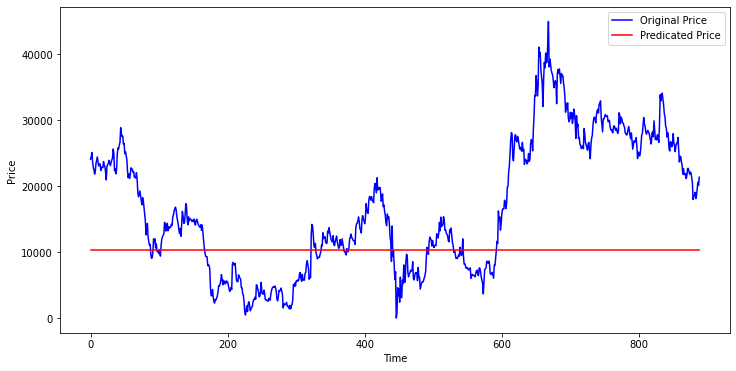

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicated Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
#st.subheader('Accuracy Result For Given Model: ')
# model.fit(x_test,y_test,epochs=100, batch_size=1)
# accurecy=model.accuracy_score(y_test,x_test)
#print("X test=",x_test)
#print("Y test=",y_test)
accurecy=model.evaluate(y_pred, y_test)
print("Score is: ",(accurecy)*80),
#st.write("Accuracy: ",round(accurecy,2))

28/28 [==============================] - 0s 6ms/step - loss: 381135520.0000 - accuracy: 0.0011
Score is:  [381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001124859438277781, 381135520.0, 0.001